In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_data_feature_selection_NEW.csv to cleaned_data_feature_selection_NEW.csv


In [ ]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['cleaned_data_feature_selection_NEW.csv']))

In [ ]:
# Prepare the data
X = df.drop(['CLASS', 'Unnamed: 0'], axis=1)  # Adjust based on your dataset's column names
y = df['CLASS']

In [ ]:
# Encoding the target variable to ensure it's in a suitable format for modeling
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [ ]:
# Initialize the SVM classifier
svm_classifier = SVC(random_state=42)

In [ ]:
# Define the parameter grid for hyperparameter tuning
param_grid_svm = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    'kernel': ['rbf', 'linear', 'sigmoid']  # Type of hyperplane used to separate the data
}

In [ ]:
# Setup GridSearchCV for SVM
gs_svm = GridSearchCV(svm_classifier, param_grid_svm, cv=5, scoring='accuracy', verbose=2)

In [ ]:
# Fit GridSearchCV to the data
gs_svm.fit(X_train, y_train_encoded)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.2s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time=   0.3s
[CV] END .................C=0.1, gamma=scale, k

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.01, 0.1, 1],
                         'kernel': ['rbf', 'linear', 'sigmoid']},
             scoring='accuracy', verbose=2)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Predict and evaluate
y_pred_svm = gs_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test_encoded, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test_encoded, y_pred_svm)

In [ ]:
print(f"Accuracy: {accuracy_svm}")
print("Confusion Matrix:")

Accuracy: 0.9567099567099567
Confusion Matrix:


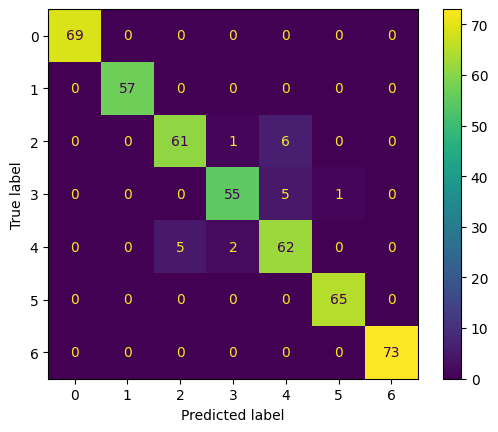

In [ ]:
import matplotlib.pyplot as plt

confusion_matrix = confusion_matrix(y_test_encoded, y_pred_svm)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, f1_score

# Calculate precision
precision = precision_score(y_test_encoded, y_pred_svm, average='macro')
print(f'Precision: {precision}')

# Calculate F1 score
f1 = f1_score(y_test_encoded, y_pred_svm, average='macro')
print(f'F1 Score: {f1}')

Precision: 0.958097405664718
F1 Score: 0.957203336846664
